# Gravimetry : Repetability

Compare data acquired at two different stations after correction of derive

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

/home/valentin/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('data/repetabilite.csv', index_col=0)

In [3]:
def f(x):
    t = x.split(':')
    s = ''
    for e in t:
        if len(e) == 1:
            s+= '0'
        s += e
    return s

In [4]:
df['GRAV'] = df['GRAV (mgal)'].map(lambda x: float(x.replace(',', '.')))
df['DEC.TIME+DATE'] = df['DEC.TIME+DATE'].map(lambda x: float(x.replace(',', '.')))
df['TIME'] = df['TIME'].map(f)

In [5]:
df

,LINE,STATION,ALT.,GRAV (mgal),SD,TILTX,TILTY,TEMP,TIDE,DUR,REJ,TIME,DEC.TIME+DATE,TERRAIN,DATE,GRAV
0,REPETABILITY,0,"28,1248","4508,6390000000001","0,0099999999999999999998","-5,6","-5,9","-0,65","-0,050999999999999997",60,6,"0,32652777777777781",45507.32601,0,04/09/24,4508.639
1,REPETABILITY,0,"28,1248","4508,6379999999999","0,010999999999999999","-5,8","-5,8","-0,65","-0,050999999999999997",60,19,"0,32728009259259255",45507.32676,0,04/09/24,4508.638
2,REPETABILITY,30,"26,66","4504,3900000000003","0,0089999999999999993","2,5","-2,8","-0,47999999999999999999","-0,041000000000000002",60,0,"0,34284722222222225",45507.34230,0,04/09/24,4504.390
3,REPETABILITY,30,"26,9041","4504,3909999999996","0,0089999999999999993","3,3","-2,9","-0,49","-0,04",60,26,"0,34359953703703705",45507.34305,0,04/09/24,4504.391
4,REPETABILITY,30,"26,9041","4504,3890000000001","0,025000000000000001","3,3","-2,8","-0,51","-0,04",60,14,"0,34435185185185185",45507.34380,0,04/09/24,4504.389
5,REPETABILITY,0,"25,1951","4508,6469999999999","0,014","1,7","-6,4","-0,5","-0,034000000000000002",60,16,"0,35297453703703702",45507.35241,0,04/09/24,4508.647
6,REPETABILITY,0,"25,439299999999999","4508,6469999999999","0,0089999999999999993","0,9","-7,7","-0,5","-0,034000000000000002",60,0,"0,35378472222222218",45507.35322,0,04/09/24,4508.647
7,REPETABILITY,0,"25,439299999999999","4508,6469999999999","0,012",0,"-8,6999999999999993","-0,51","-0,033000000000000002",60,5,"0,35453703703703704",45507.35397,0,04/09/24,4508.647
8,REPETABILITY,0,"26,171700000000001","4508,6450000000004","0,012","3,1","0,7","-0,62","-0,025000000000000001",60,9,"0,36644675925925929",45507.36586,0,04/09/24,4508.645
9,REPETABILITY,0,"26,415800000000001","4508,6440000000002","0,0080000000000000002","3,1","0,7","-0,62","-0,024",60,0,"0,36725694444444446",45507.36667,0,04/09/24,4508.644


In [6]:
coef = 0.10650296301540516 # obtenu dans le notebook dérive

In [7]:
df['GRAVCORR'] = df['GRAV'] - coef*(df['DEC.TIME+DATE'] - df['DEC.TIME+DATE'].iloc[0])

In [8]:
np.max(df['GRAVCORR']) - np.min(df['GRAVCORR'])

4.268975127381964

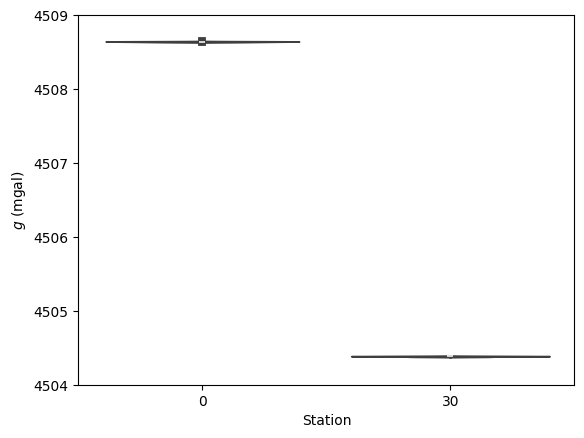

In [9]:
fig = plt.figure()

subdf = df[df['STATION'] != 1]
sns.violinplot(x=subdf['STATION'], y=subdf['GRAVCORR'])
plt.ylabel('$g$ (mgal)')
plt.xlabel('Station')
xx, locs = plt.yticks()
ll = ['%.0f' % a for a in xx]
plt.yticks(xx, ll)
plt.savefig('figures/gravi_corr_valeurs.png')

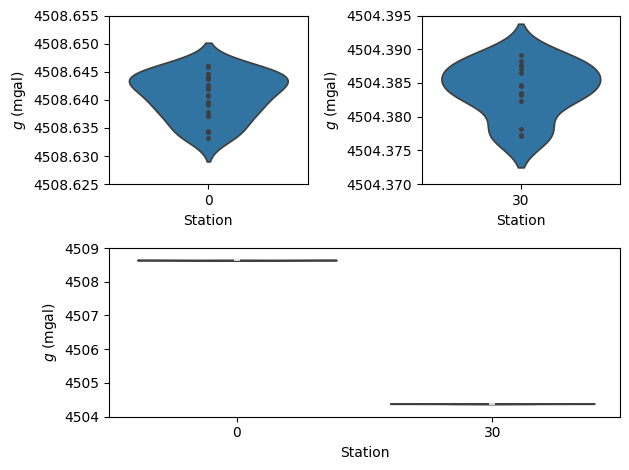

In [10]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0, 0])
subdf = df[df['STATION'] == 0]
sns.violinplot(x=subdf['STATION'], y=subdf['GRAVCORR'], inner="point")

plt.ylabel('$g$ (mgal)')
plt.xlabel('Station')

xx, locs = plt.yticks()
ll = ['%.3f' % a for a in xx]
plt.yticks(xx, ll)

plt.subplot(gs[0, 1])
subdf = df[df['STATION'] == 30]
sns.violinplot(x=subdf['STATION'], y=subdf['GRAVCORR'], inner="point")

plt.ylabel('$g$ (mgal)')
plt.xlabel('Station')

xx, locs = plt.yticks()
ll = ['%.3f' % a for a in xx]
plt.yticks(xx, ll)

plt.subplot(gs[1, :])
subdf = df[df['STATION'] != 1]
sns.violinplot(x=subdf['STATION'], y=subdf['GRAVCORR'])
plt.ylabel('$g$ (mgal)')
plt.xlabel('Station')
xx, locs = plt.yticks()
ll = ['%.0f' % a for a in xx]
plt.yticks(xx, ll)

plt.tight_layout()
plt.savefig('figures/gravi_corr_valeurs.png')

(array([3., 0., 0., 0., 1., 3., 2., 1., 3., 2.]),
 array([4504.37709247, 4504.37830174, 4504.37951101, 4504.38072028,
        4504.38192956, 4504.38313883, 4504.3843481 , 4504.38555737,
        4504.38676664, 4504.38797592, 4504.38918519]),
 <BarContainer object of 10 artists>)

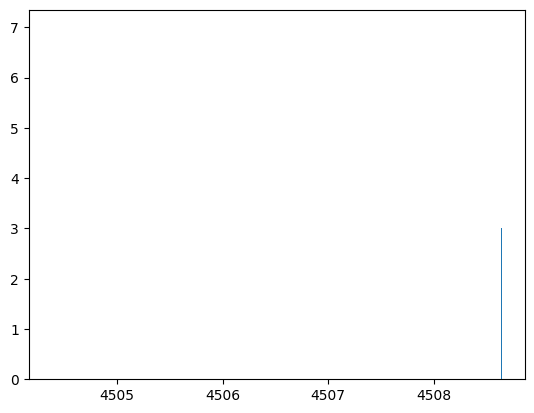

In [11]:
fig = plt.figure()

subdf = df[df['STATION'] == 0]
plt.hist(subdf['GRAVCORR'], label='Mesure', bins=10)
subdf = df[df['STATION'] == 30]
plt.hist(subdf['GRAVCORR'], label='Mesure', bins=10)